<a href="https://colab.research.google.com/github/CogitoNTNU/course-on-machine-learning/blob/main/machine-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course on Supervised Machine Learning

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot

%pip install numpy matplotlib scipy pandas seaborn scikit-learn statsmodels dtreeviz==1.4.0 graphviz pydot

# If you want to use neural networks, you can install tensorflow
# % pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree


from dtreeviz.trees import dtreeviz


print("[SUCCESS] Setup complete")

[SUCCESS] Setup complete


## The Machine Learning project cycle
Machine learning is a process that involves several steps. The following is a typical machine learning project cycle:

1. **Problem definition**: Define the problem you are trying to solve. This is the most important step in the machine learning project cycle. If you don't define the problem correctly, you will not be able to solve it.
2. **Data collection**: Collect data that will be used to train the machine learning model. The data should be representative of the problem you are trying to solve.
3. **Data preprocessing**: Clean the data and prepare it for training. This may involve removing missing values, normalizing the data, and encoding categorical variables.
4. **Model selection**: Choose the machine learning model that will be used to solve the problem. There are many different machine learning models to choose from, and the best model will depend on the problem you are trying to solve.
5. **Model training**: Train the machine learning model on the training data. This involves feeding the model the training data and adjusting the model's parameters to minimize the error.
6. **Model evaluation**: Evaluate the performance of the machine learning model on the test data. This involves feeding the model the test data and measuring how well the model performs.
7. **Model deployment**: Deploy the machine learning model in a production environment. This may involve integrating the model with other systems and monitoring the model's performance over time.
8. **Model maintenance**: Maintain the machine learning model over time. This may involve retraining the model on new data and updating the model's parameters.

## Load data
We store our data in a pandas DataFrame. A DataFrame holds the type of data you might think of as a table. This is similar to a sheet in Excel, or a table in a SQL database.

In [3]:
training_data: pd.DataFrame = pd.read_csv('data/train.csv')
test_data: pd.DataFrame = pd.read_csv('data/test.csv')
training_data.describe()

,TicketClass,Age,SiblingAndSpousesOnBoard,ParentsAndChildrenOnBoard,Fare,Survived
count,712.000000,572.000000,712.000000,712.000000,712.000000,712.000000
mean,2.330056,29.498846,0.553371,0.379213,32.586276,0.376404
std,0.824584,14.500059,1.176404,0.791669,51.969529,0.484824
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,30.500000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


## TASK 1: Define the problem
The target is the variable we want to predict. The features are the variables we use to predict the target.
It is common to use `X` to denote the features and `y` to denote the target. 
It is important to separate the features from the target before we start training the model, as we do not have access to the target when we are making real predictions.


In [4]:
# TODO: Name the target column "Survived" 
target_column = "Survived"
training_data.head()

,TicketClass,Name,Sex,Age,SiblingAndSpousesOnBoard,ParentsAndChildrenOnBoard,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,Southampton,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,Southampton,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,Southampton,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,Southampton,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,Southampton,0


## Exploratory data analysis
Exploratory data analysis (EDA) is the process of analyzing data to extract insights and patterns. EDA is an important step in the machine learning project cycle, as it helps us understand the data and identify any issues that need to be addressed before training the model.

For visualization, we will use the `matplotlib` and `seaborn` libraries. These libraries provide a wide range of plotting functions that can be used to create informative and visually appealing plots.

To get the full overview check out: [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html)



## TASK 2.1: Get an overview of the data
The first step in exploratory data analysis is to look at the data. This involves examining the data to understand its structure, content, and quality. We can use the `training_data.head()` method to display the first few rows of the data, the `training_data.describe()` method to display statistics of the data, and the `training_data.info()` method to display information about the data types of the columns. 

Use these methods to get an overview of the data.

In [5]:
# TODO: Check the first few rows, what features are available?


In [6]:
# TODO: Check statistics of the data, how many data points are there?  


<details> 
<summary>Statistical explanation</summary>

The results show 8 numbers for each column in the dataset. The first number, the **count**, shows how many rows have non-missing values.

Missing values arise for many reasons. For example, the data was not collected, the data was lost, or the data was not saved. Missing values can be handled in different ways, such as removing the rows with missing values, imputing the missing values, or using a machine learning model that can handle missing values.

The second value is the **mean**, which is the average. Under that, **std** is the standard deviation, which measures how numerically spread out the values are.

To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

</details>

In [7]:
# TODO: Check the data types of the columns and see if there are any missing values


## TASK 2.2: Does the gender of the passenger affect the survival rate?
Look at the plot and answer the question.

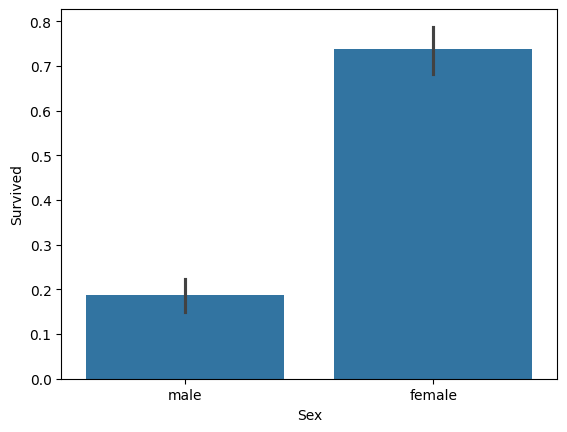

In [8]:
sns.barplot(x='Sex', y=target_column, data=training_data)
plt.show()

## TASK 2.3: Does the "TicketClass" the passenger affect the survival rate?
Try to plot the survival rate for each ticket class. If so why does it intuitively make sense?

In [9]:
# TODO Plot the survival rate by "TicketClass"


## TASK 2.4: There are many missing values in the "Age" feature. How do you think the age of the passengers affects the survival rate?
The age of the passengers is an important feature that can affect the survival rate. However, the age feature contains missing values. We need to handle these missing values before we can use the age feature in the model.

Discuss in the group how you think the age of the passengers affects the survival rate and how you would handle the missing values in the age feature.

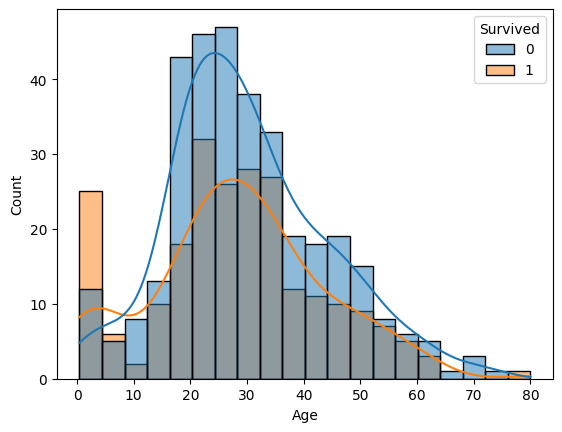

The number of missing values in each column:
TicketClass                    0
Name                           0
Sex                            0
Age                          140
SiblingAndSpousesOnBoard       0
ParentsAndChildrenOnBoard      0
Fare                           0
Embarked                       2
Survived                       0
dtype: int64


In [10]:
sns.histplot(data=training_data, x='Age', hue=target_column, kde=True)
plt.show()

print("The number of missing values in each column:")
print(training_data.isna().sum())

## Preprocessing of data
When we are working with data, we need to preprocess it before we can use it to train a model. This preprocessing can include:
* **Handling Missing Values**:
  * **Imputation**: Replace missing values with a specific value like the mean, median, mode, or a constant value. This method is chosen based on the nature of the data and the type of variable (continuous or categorical). `data['column_name'] = data['column_name'].fillna(data['column_name'].mean())`, or use `sklearn.impute.SimpleImputer` to replace missing values with the mean, median, or mode.
  * **Deletion**: Remove rows or columns with missing values, typically used when the proportion of missing data is minimal or if the missing data is not random.

* **Encoding categorical variables**:
  * **One-Hot Encoding**: Convert categorical variables into a numerical representation. This is done by creating a binary column for each category in the categorical variable. `data = pd.get_dummies(data, columns=['column_name'])`, or use `sklearn.preprocessing.OneHotEncoder` to encode categorical variables.
  * **Label Encoding**: Convert categorical variables into a numerical representation. This is done by assigning a unique integer to each category in the categorical variable. `data['column_name'] = data['column_name'].cat.codes`, or use `sklearn.preprocessing.LabelEncoder` to encode categorical variables.
* **Feature Scaling**:
  * Normalization (Min-Max Scaling): Scales the features to a fixed range, usually 0 to 1, or -1 to 1. 
* **Handling Outliers**:
  * **Trimming**: Remove extreme values.
  * **Capping**: Apply thresholds to limit the range of variable values.


In [11]:
def engineer_features(data: pd.DataFrame) -> pd.DataFrame:
    data = data.drop(columns=[target_column], errors='ignore')
    # TODO: Implement feature engineering here
    data = data.drop(columns=['Name'])
    data = pd.get_dummies(data)
    return data


In [12]:
# TODO: dropna should be removed when you implement the feature engineering for missing data
training_data = training_data.dropna()
y = training_data[target_column]

X = engineer_features(training_data)
X_test = engineer_features(test_data)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## TASK 3: Train and tune your first Machine learning Model
* Change `max_depth` to a different value and see how it affects the performance of the model. The `max_depth` parameter controls the maximum depth of the decision tree. A higher value of `max_depth` will result in a more complex decision tree, which may lead to overfitting.
* Change `min_samples_split` to a different value and see how it affects the performance of the model. The `min_samples_split` parameter controls the minimum number of samples required to split an internal node. A higher value of `min_samples_split` will result in a simpler decision tree, which may lead to underfitting.
* Change the `n_estimators` parameter to a different value and see how it affects the performance of the model. The `n_estimators` parameter controls the number of trees in the random forest.
* Comment out the `HistGradientBoostingClassifier` check how it performs compared to the `RandomForestClassifier`. PS: Remember to change back to `RandomForestClassifier` before you continue 

## Train models
The steps to building and using a model are:

* **Define**: What type of model will it be? A decision tree? Some other type of model like Neural Networks? Some other parameters of the model type are specified too.
* **Fit**: Capture patterns from provided data. This is the heart of modeling. `model.fit(X, y)`
* **Predict**: Just what it sounds like `model.predict(X_val)`
* **Evaluate**: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [13]:
# Define model. Specify a number for random_state to ensure same results each run
# To see more what the model is doing, set verbose=1 or 2

model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=2)

# TODO: Try a different model (Some of the models require different hyperparameters so you may need to adjust them in the next cell)
# model = HistGradientBoostingClassifier(random_state=42, max_iter=1000, max_depth=2)
# model = AdaBoostClassifier(random_state=42, n_estimators=100)

# Fit model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

##

## Make predictions

In [14]:
amount = 1
print(f"Making predictions for the following {amount} people:")
print(X_val.head(amount))
print("The predictions are")
print(model.predict(X_val.head(amount)))

# Get the accuracy of the model
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy}")

Making predictions for the following 1 people:
     TicketClass   Age  SiblingAndSpousesOnBoard  ParentsAndChildrenOnBoard  \
633            1  38.0                         1                          0   

        Fare  Sex_female  Sex_male  Embarked_Cherbourg  Embarked_Queenstown  \
633  71.2833        True     False                True                False   

     Embarked_Southampton  
633                 False  
The predictions are
[1]
Accuracy: 0.7719298245614035


## Fine-tune the hyperparameters of the model
Fine-tuning a model involves adjusting the model's hyperparameters to improve its performance. Hyperparameters are parameters that are set before the model is trained and cannot be learned from the data. Examples of hyperparameters include the learning rate, the number of hidden layers in a neural network, and the number of trees in a random forest.
The following are an example of hyperparameters for a decision tree model using scikit-learn GridSearchCV:
* **Grid search**: Grid search involves searching through a predefined set of hyperparameters and selecting the set of hyperparameters that produces the best performance.


In [15]:
# Define the grid search parameters
# These can be found in the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None], # Number of features to consider at every split
    'max_depth': [4, 6, 8, 10], # Maximum number of levels in tree
    'criterion': ['gini', 'entropy', 'log_loss'] # Function to measure the quality of a split
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found by grid search: {best_params}')

# Train the classifier with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = best_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation set accuracy after tuning: {accuracy}')



Best parameters found by grid search: {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'n_estimators': 300}
Validation set accuracy after tuning: 0.8157894736842105


## Create submission file

In [16]:
# Prepare the submission file
submission = pd.DataFrame()
submission["PassengerId"] = test_data.index
submission["Survived"] = best_model.predict(X_test)
submission.to_csv('titanic_submission.csv', index=False)

## Understand the model
After training the model, it is important to understand how the model works and how it makes predictions. This can help us identify any issues with the model and improve its performance.

### Feature importance
Some machine learning models provide a measure of feature importance, which indicates how much each feature contributes to the model's predictions. Feature importance can help us understand which features are most important for predicting the target variable and identify any features that are not useful for the model.

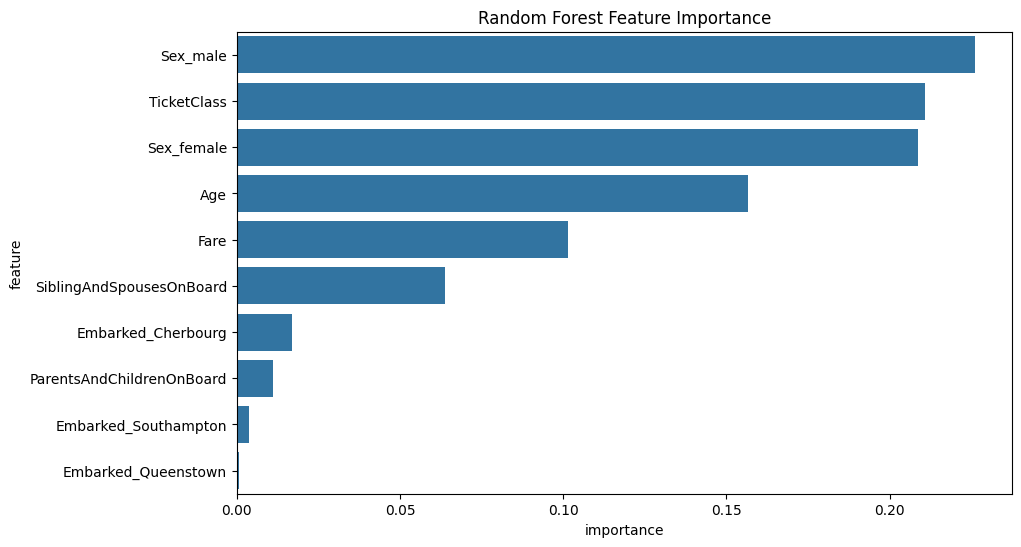

In [17]:
# Random Forest Feature Importance
# NB: Not all models have feature importance, but Random Forest does.
feature_importances = best_model.feature_importances_
features = X_train.columns
df = pd.DataFrame({'feature': features, 'importance': feature_importances})
df = df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=df)
plt.title('Random Forest Feature Importance')
plt.show()

### TASK 4.0 Interpret a decision tree model
Create a hypothetical passenger and go down the decision tree to predict whether the passenger survived or not.

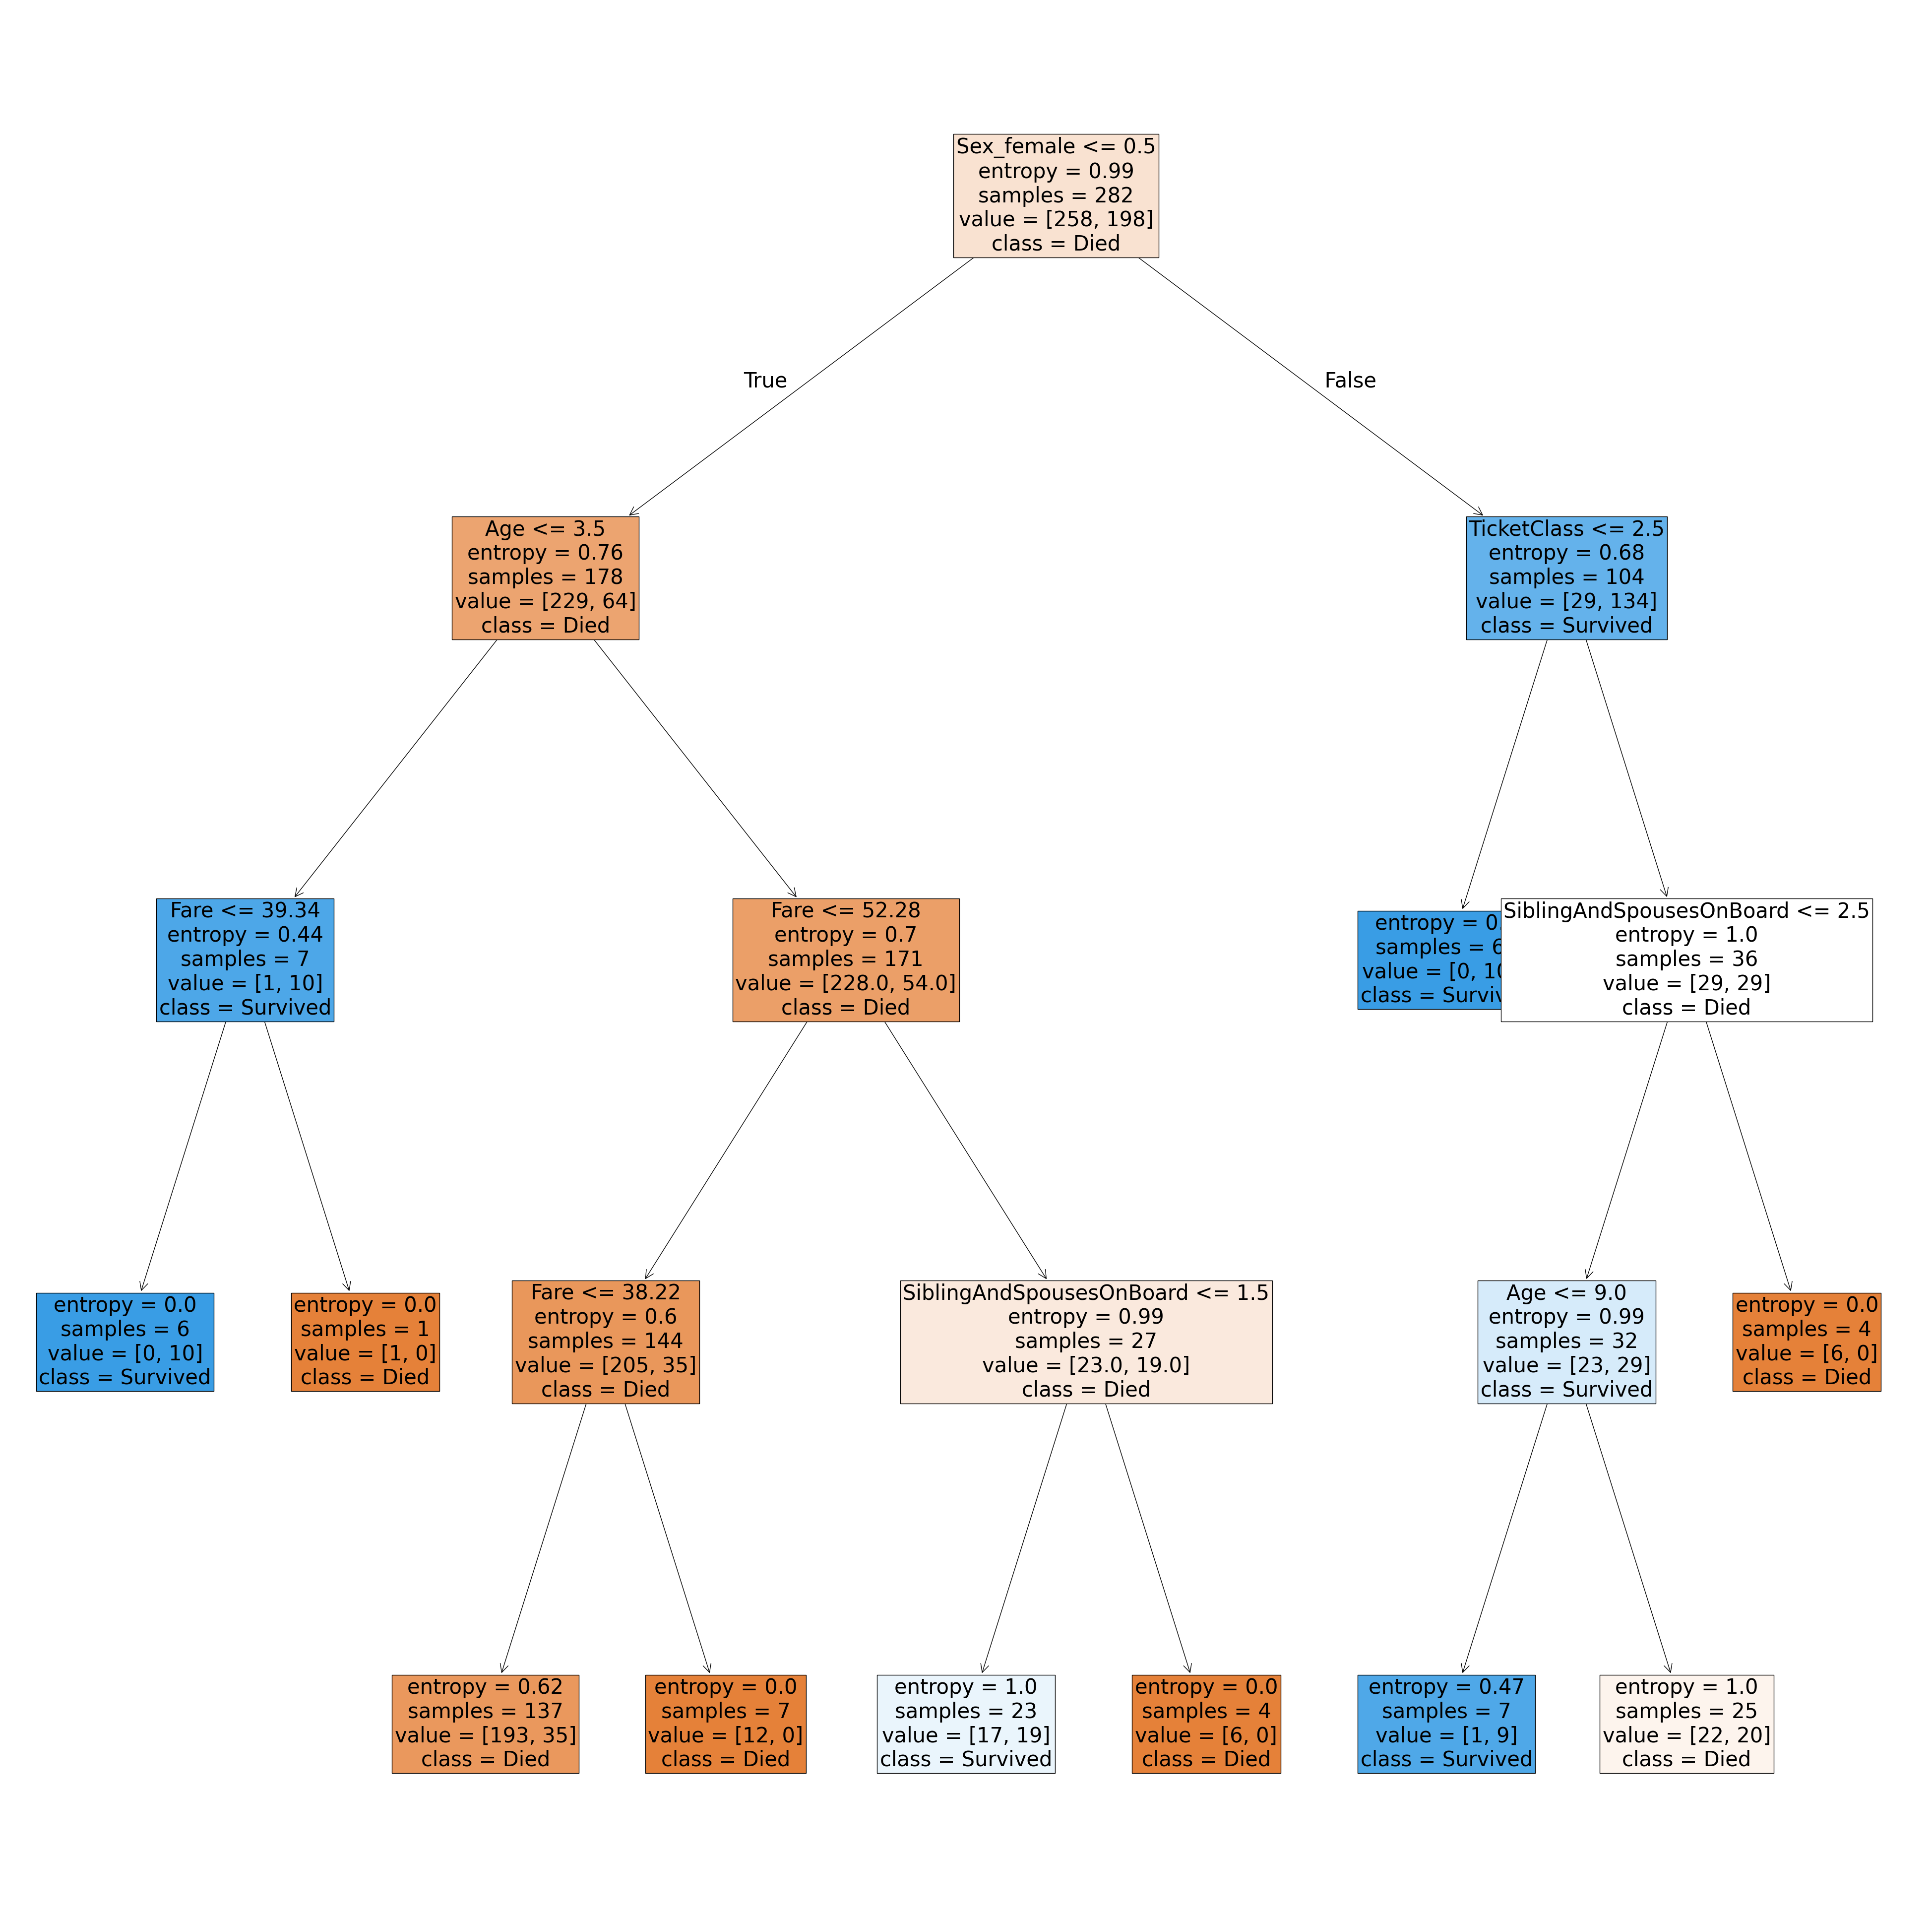

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

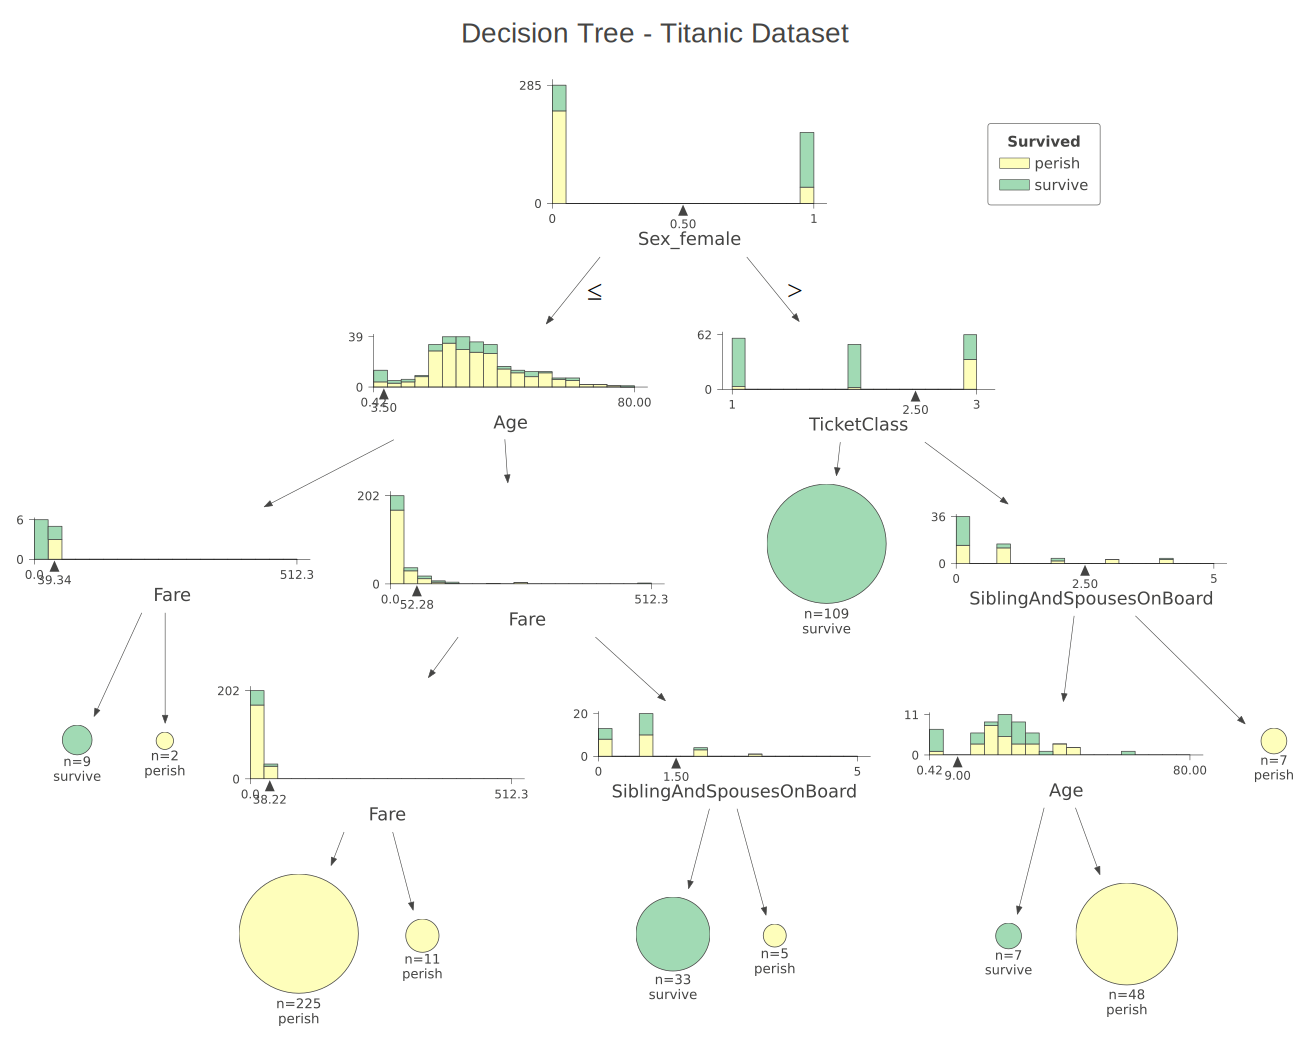

In [18]:
single_tree = best_model.estimators_[0]
plt.figure(figsize=(50, 50))
plot_tree(
    single_tree,
    filled=True,
    feature_names=X_train.columns, 
    fontsize=30,
    precision=2,
    class_names=['Died', 'Survived']
)
plt.show()

viz = dtreeviz(single_tree,
               x_data=X_train,
               y_data=y_train,
               target_name=target_column,
               feature_names=X_train.columns,
               class_names=["perish", "survive"],
               title="Decision Tree - Titanic Dataset",
               scale=2.0
               )
viz

## Confusion matrix
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. The confusion matrix is a 2x2 matrix that contains four values:

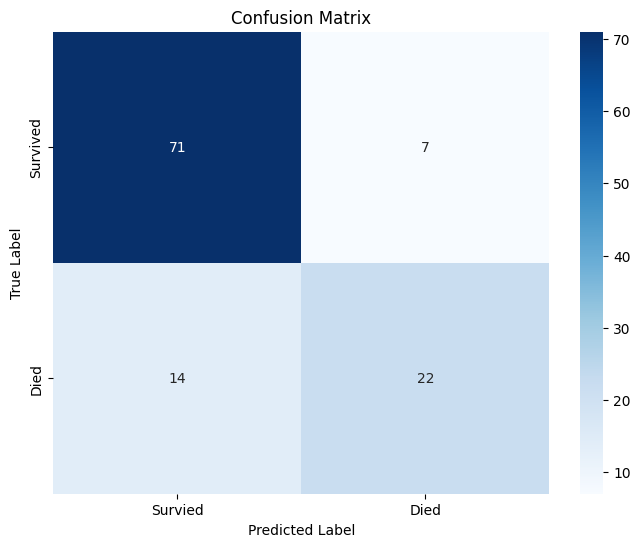

In [19]:
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Survied", "Died"], yticklabels=["Survived", "Died"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## TASK 5: Competition time!
Now that you have trained a model and made predictions on the test data and submitted the predictions to Kaggle, it's time to see how well your model performs in the competition. The goal of the competition is to predict whether a passenger survived or not based on the features in the test data.


## Tips for the competition
* **Our friend in the Cloud**: ChatGPT can help you with the competition. You can ask ChatGPT for tips on how to improve the performance of your model, how to preprocess the data, how to tune the hyperparameters of the model, and how to interpret the model's predictions.
* **Feature Engineering**: Create new features from the existing features to improve the performance of the model.
  * For example, you can create new features by combining existing features, transforming existing features, or extracting information from existing features.
The Names of the passengers contain titles such as "Mr.", "Mrs.", "Miss.", "Master", "Major", etc. You can extract these titles and create a new feature called "Title" to improve the performance of the model.
  * Maybe one can extract the family size from the "SiblingAndSpousesOnBoard" and "ParentsAndChildrenOnBoard" features and create a new feature called "FamilySize". 
  * The "Age" feature contains missing values. You can impute the missing values using the mean, median, or mode of the "Age" feature. As of now we drop all rows with missing values in the "Age" feature. Maybe one can do a better job of imputing the missing values in the "Age" feature.
* **Train Multiple Models**: Train multiple models and compare their performance to select the best model.
  Examples of machine learning models that can be used for classification problems include:
  
  If you want to use a neural network, you can use the `tensorflow` or `keras` library to build a neural network model. Here is an example of training a neural network model using `keras`:

  <details>
  <summary>Example of training a neural network model using keras</summary>

  ```python
  from tensorflow import keras
  # Define the neural network architecture
  nn_model = keras.Sequential([
      keras.layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu', name='Input_Layer'),
      keras.layers.Dense(5, activation='relu', name='Hidden_Layer_1'),
      keras.layers.Dense(1, activation='sigmoid', name='Output_Layer')
  ])

  # Compile the model with the chosen optimizer, loss function, and evaluation metric
  nn_model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  # Display the model's architecture
  nn_model.summary()

  # Train the model on the training data
  history = nn_model.fit(
      X_train, y_train, 
      epochs=10,  # Number of epochs (iterations over the entire dataset)
      batch_size=32,  # Number of samples per gradient update
      validation_data=(X_val, y_val),  # Monitor the validation performance during training
      verbose=1  # Print training progress
  )

  # Predict on the validation set
  y_pred = nn_model.predict(X_val)

  # Post-processing of predictions if needed (e.g., converting probabilities to binary labels)
  y_pred = (y_pred > 0.5).astype(int)

  # Evaluate the model's performance on the validation set
  loss, accuracy = nn_model.evaluate(X_val, y_val)
  print(f'Validation Loss: {loss:.4f}')
  print(f'Validation Accuracy: {accuracy:.4f}')
  ```
  </details>
  
* **Hyperparameter Tuning**: Tune the hyperparameters of the model to improve its performance.
* **Cross-Validation**: Use cross-validation to evaluate the performance of the model on different subsets of the data.
* **Automated Machine Learning (AutoML)**: Use AutoML tools to automatically select the best model and hyperparameters for the problem. Examples of AutoML tools include `TPOT`, `Auto-sklearn`, [`H2O AutoML`](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html), and [`AutoGloun`](https://auto.gluon.ai/stable/index.html). I recommend using `AutoGloun` as it is easy to use and can provide state-of-the-art performance.
* **Model Stacking**: Models learn in different ways and if two models are almost as accurate but have different predictions for some observations, you can improve the accuracy of the model by combining the predictions of the two models. This is called model stacking. You can improve the performance of the model by combining multiple models to improve the performance of the model. [Code example on model stacking](https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html)  or to delve deeper into the theoretical [Read more about model stacking](https://developer.ibm.com/articles/stack-machine-learning-models-get-better-results/) ![Model Stacking](https://developer.ibm.com/developer/default/articles/stack-machine-learning-models-get-better-results/images/model_stacking_overview-4.png)
